In [1]:
import pandas as pd
file_mit_test = 'mitbih_test.csv'
file_mit_train = 'mitbih_train.csv'
file_ptbdb_ab = 'ptbdb_abnormal.csv'
file_ptbdb_no = 'ptbdb_normal.csv'

df_mit_test = pd.read_csv(file_mit_test, header=None)
df_mit_train = pd.read_csv(file_mit_train, header=None)
df_ptbdb_ab = pd.read_csv(file_ptbdb_ab, header=None)
df_ptbdb_no = pd.read_csv(file_ptbdb_no, header=None)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tools.plot as plot
%matplotlib inline
X_train = df_mit_train.iloc[:,:-1]
X_test = df_mit_test.iloc[:,:-1]
Y_train_1 = df_mit_train.iloc[:,-1]
Y_test_1 = df_mit_test.iloc[:,-1]
n_rows_train = X_train.shape[0]
n_rows_test = X_test.shape[0]
n_cols = np.max(Y_train_1)+1

In [3]:
# change Y to  vectors
Y_train = np.zeros((int(n_rows_train),int(n_cols)),dtype = float)
# print(Y_train[:5,:])
Y_test = np.zeros((int(n_rows_test),int(n_cols)),dtype = float)
# print(Y_test[:5,:])

for counter,value in enumerate(Y_train_1):
    Y_train[counter, int(value)] = 1.0
    
for counter,value in enumerate(Y_test_1):
    Y_test[counter, int(value)] = 1.0

In [4]:
# Transfer matrix back to vector
def DTrans(Y_test):
    rows = int(Y_test.shape[0])
    Y_test_v = np.zeros((rows,1))
    for i in range(rows):
        tem = Y_test[i,:]
        ind = np.argmax(tem)
        Y_test_v[i] = ind
    return Y_test_v
Y_test_v = DTrans(Y_test)
# print(Y_test_v[-5:])

[[4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [5]:
# (1) decision trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))
# Accuracy on test set: 0.953

Accuracy on training set: 1.000
Accuracy on test set: 0.953


Confusion matrix, without normalization
[[17671   187   146    47    67]
 [  186   354    12     1     3]
 [  153    15  1237    24    19]
 [   41     1    21    98     1]
 [   74     5    19     0  1510]]


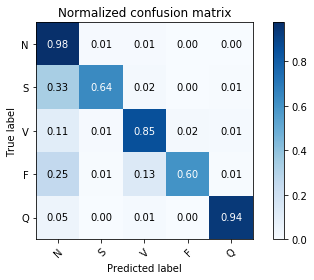

In [6]:
# Plot Results
test_pred = tree.predict(X_test)
test_pred_v = DTrans(test_pred)
# plot.plot_cm(Y_test, test_pred, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
plot.plot_cm(Y_test_v, test_pred_v, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
# test_pred.shape

In [7]:
# (2) k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,Y_train)
print('k-nearest neighbors score:', clf.score(X_test, Y_test))
# k-nearest neighbors score: 0.9622693221268043 

k-nearest neighbors score: 0.9622693221268043


Confusion matrix, without normalization
[[18062    24    24     5     3]
 [  194   353     8     1     0]
 [  158     2  1275     9     4]
 [   55     0    10    97     0]
 [   79     0     3     0  1526]]


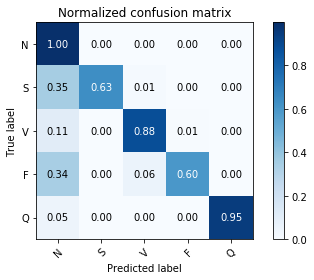

In [8]:
knn_pred = clf.predict(X_test)
knn_pred_v = DTrans(knn_pred)
# plot.plot_cm(Y_test, test_pred, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
plot.plot_cm(Y_test_v, knn_pred_v, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
# test_pred.shape

In [10]:
# (3) Random Forest
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(n_estimators=10, random_state=5)
forest1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, Y_test)))
#Accuracy on test set: 0.966

Accuracy on training set: 0.996
Accuracy on test set: 0.966


Confusion matrix, without normalization
[[18102     7     6     1     2]
 [  236   318     1     0     1]
 [  200     0  1234    12     2]
 [   59     0    11    92     0]
 [  113     0     3     0  1492]]


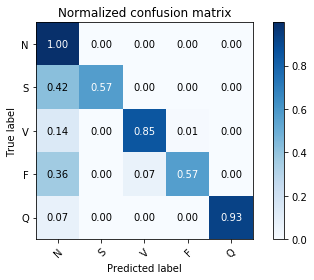

In [11]:
#Plot Results
test_pred = forest1.predict(X_test)
test_pred_v = DTrans(test_pred)
# plot.plot_cm(Y_test, test_pred, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
plot.plot_cm(Y_test_v, test_pred_v, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
# test_pred.shape

In [12]:
#(4) Neural Networks
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, Y_test)))
#Accuracy on test set: 0.963

Accuracy on training set: 0.969
Accuracy on test set: 0.963


Confusion matrix, without normalization
[[18048    27    25     4    14]
 [  208   345     2     0     1]
 [  149     4  1275    17     3]
 [   63     0    21    78     0]
 [   73     1    21     0  1513]]


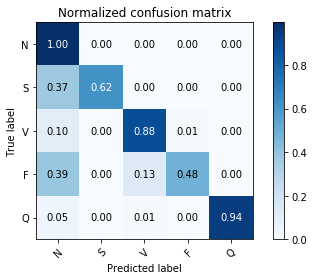

In [13]:
#Plot Results
test_pred = mlp.predict(X_test)
test_pred_v = DTrans(test_pred)
# plot.plot_cm(Y_test, test_pred, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
plot.plot_cm(Y_test_v, test_pred_v, classes=np.array(["N", "S", "V", "F", "Q"]), normalize=True)
# test_pred.shape